In [1]:
# ----------------------------------------------
# 📘 1. Load libraries and dataset
# ----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Upload dataset (use Colab file uploader or read from Google Drive)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()


Saving Crop_recommendation.csv to Crop_recommendation (1).csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Crop distribution:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute

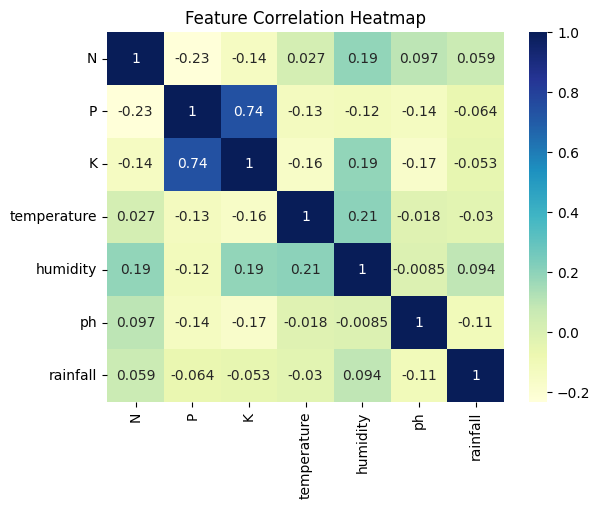

In [3]:
# ----------------------------------------------
# 📊 2. Basic EDA (Exploratory Data Analysis)
# ----------------------------------------------
df.info()
df.describe()

# Label distribution
print("Crop distribution:\n", df['label'].value_counts())

# Correlation heatmap (drop non-numeric column)
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
# ----------------------------------------------
# 🧹 3. Data Cleaning and Preprocessing
# ----------------------------------------------
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Remove outliers or noise (optional)
df = df[(df['temperature'] > 0) & (df['humidity'] > 0)]

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


✅ Accuracy: 0.9931818181818182

📄 Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

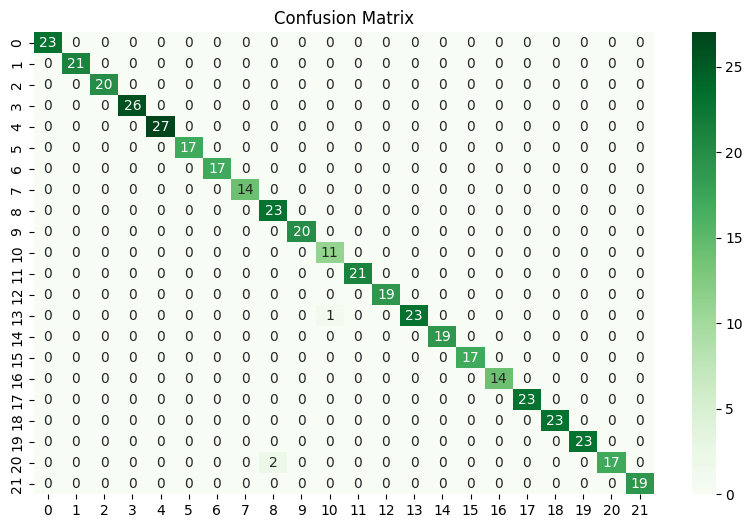

In [5]:
# ----------------------------------------------
# 🤖 4. Train ML Model and Evaluate
# ----------------------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.show()


In [6]:
# ----------------------------------------------
# 🔮 5. Prediction Cell (User Input)
# ----------------------------------------------
# Enter test input manually (as example)
input_data = np.array([[90, 42, 43, 20.5, 82.0, 6.5, 202.0]])  # change these values
input_scaled = scaler.transform(input_data)
prediction = clf.predict(input_scaled)

print("🌾 Predicted crop recommendation:", prediction[0])


🌾 Predicted crop recommendation: rice


In [12]:
# ----------------------------------------------
# 🔮 5. Prediction Cell (User Input - Custom Entry)
# ----------------------------------------------
print("Please enter the following values:")

N = float(input("Nitrogen (N): "))
P = float(input("Phosphorus (P): "))
K = float(input("Potassium (K): "))
temperature = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
ph = float(input("pH: "))
rainfall = float(input("Rainfall (mm): "))

# Create input array and scale it
input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
input_scaled = scaler.transform(input_data)

# Make prediction
prediction = clf.predict(input_scaled)
print("🌾 Predicted Crop Recommendation:", prediction[0].capitalize())
1

Please enter the following values:
Nitrogen (N): 4
Phosphorus (P): 14
Potassium (K): 41
Temperature (°C): 19.85
Humidity (%): 89.80
pH: 6.43
Rainfall (mm): 102.81
🌾 Predicted Crop Recommendation: Pomegranate


1

In [13]:
import pickle
from google.colab import files

# Save model and scaler
with open("crop_model.pkl", "wb") as f:
    pickle.dump((scaler, clf), f)

# Download the file to your computer
files.download("crop_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>